In [153]:
%reload_ext autoreload
%autoreload 2
from functions import *

# Downloading Kaggle Dataset

In [ ]:
!pip install kagglehub

In [6]:
# Download to default location
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
print("Downloaded to:", path)

# Create data directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Move files to your desired location (cut, not copy)
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), f"./data/{file}")
    
print("Files moved to ./data/")

# Optionally, remove the empty download directory
try:
    os.rmdir(path)
    print("Cleaned up empty download directory")
except OSError:
    print("Download directory not empty or couldn't be removed")

100%|██████████| 80.6k/80.6k [00:00<00:00, 487kB/s]

Extracting files...
Downloaded to: /Users/omar/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1
Files moved to ./data/
Cleaned up empty download directory



# Intial look on the data

In [68]:
# Load the dataset
df = pd.read_csv('./data/loan_approval_dataset.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (4269, 13)

First few rows:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [69]:
# Clean all column names by removing leading/trailing spaces 
# Because some columns have leading/trailing spaces which is annoying
df.columns = df.columns.str.strip()

In [70]:
# Basic info about the dataset
print("Dataset info:")
df.info()
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
df.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB

Column names:
[

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# 1 - Exploratory Data Analysis (EDA)

In [71]:
df_analysis = df.copy()

In [72]:
correlation_matrix_numeric = df_analysis.corr(numeric_only=True)
print(f"number of numeric columns: {len(correlation_matrix_numeric)}")
print(f"number of categorical columns: {len(df_analysis.columns)- len(correlation_matrix_numeric)}")

number of numeric columns: 10
number of categorical columns: 3


# 1.1 Ploting Numerical Cols

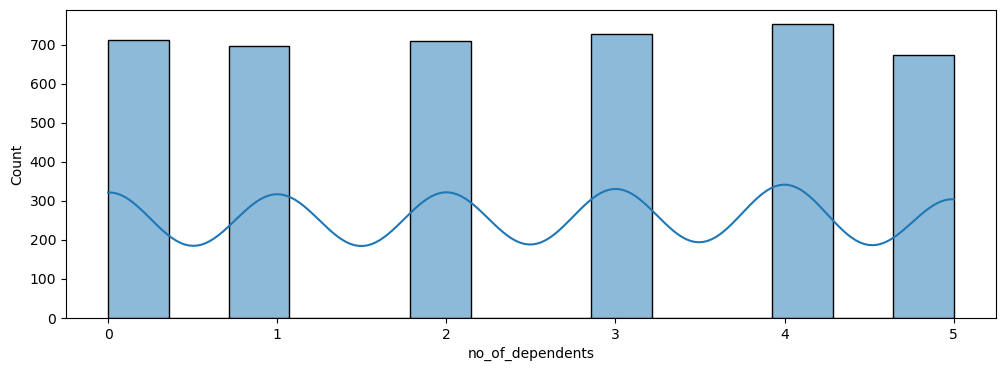

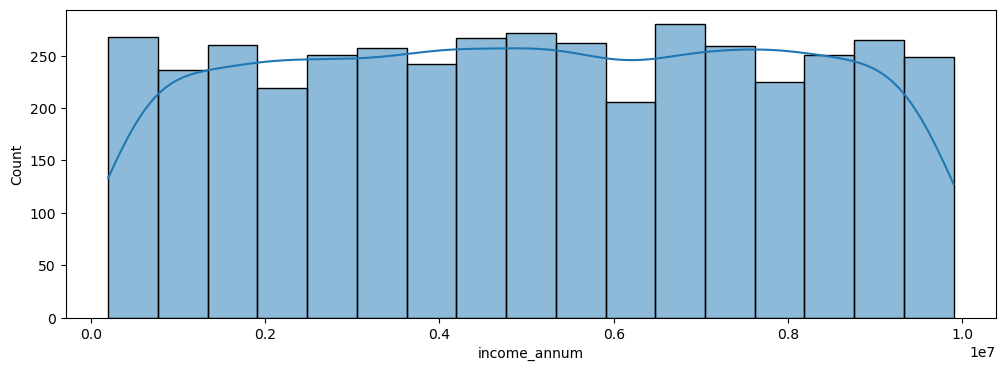

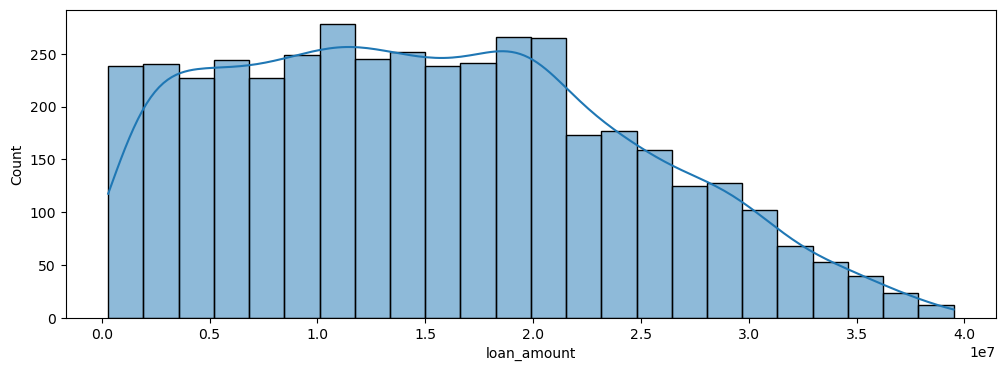

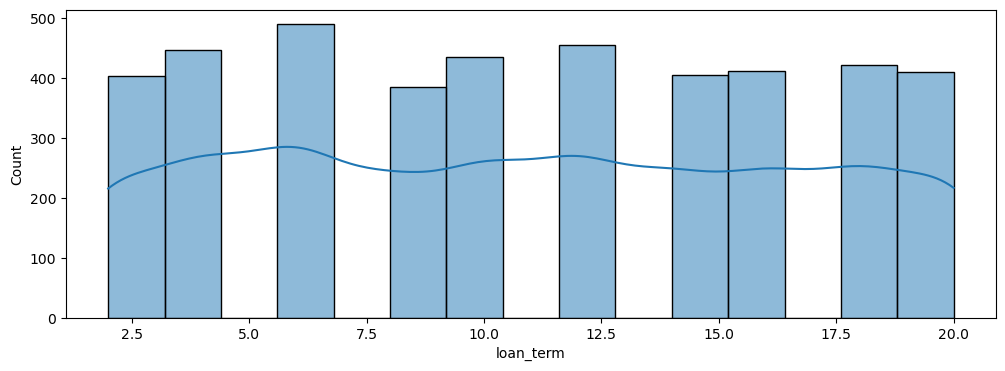

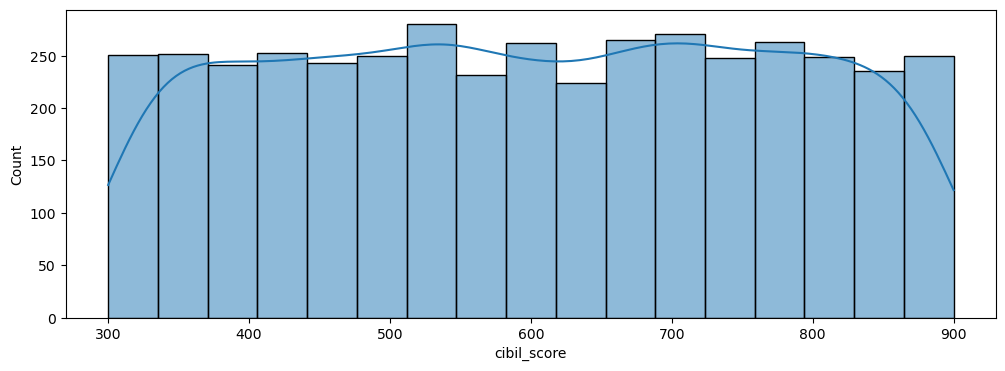

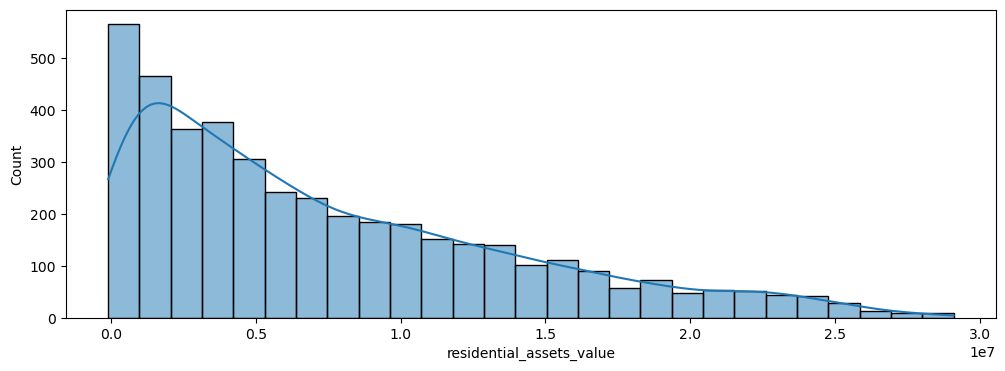

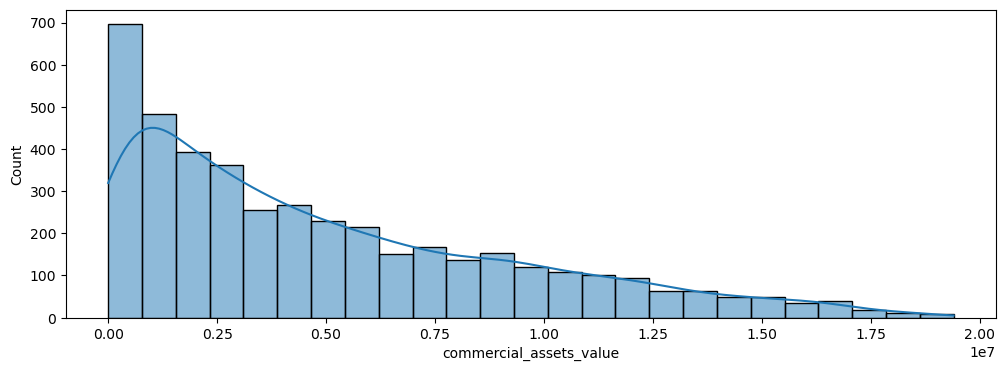

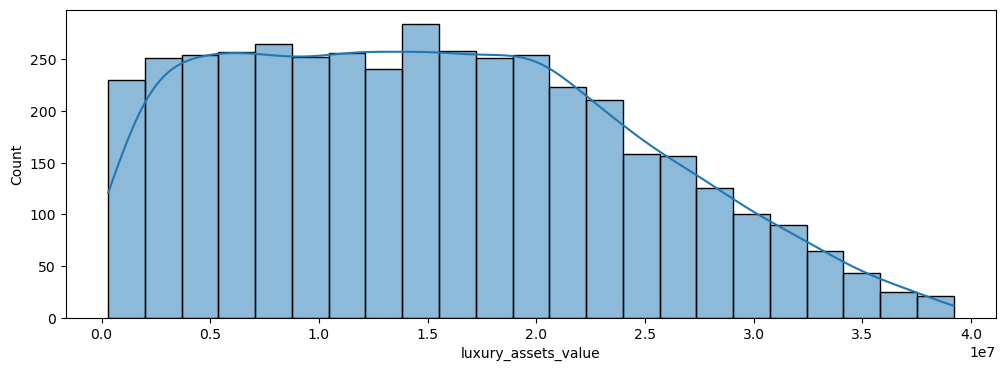

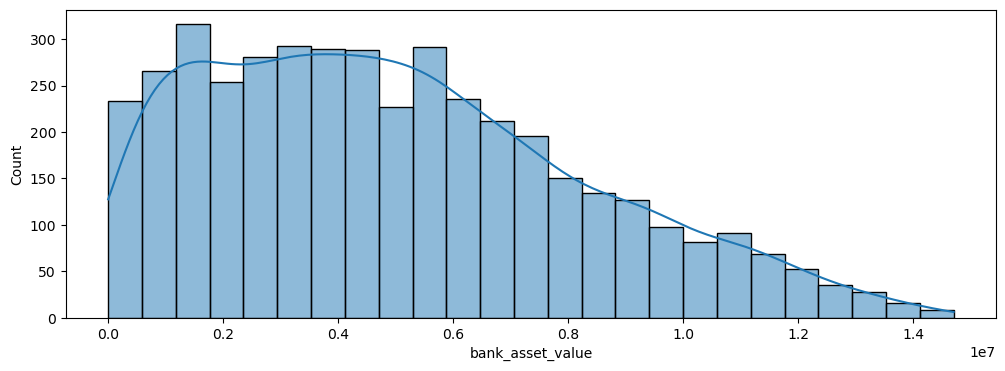

In [73]:
for col in df_analysis.columns:
    # Only plot numerical columns
    if df_analysis[col].dtype != 'O' and col != 'loan_id':  # Exclude 'loan_id' becuase its not a feature
        plt.figure(figsize=(12, 4))
        sns.histplot(df_analysis[col],kde=True)
        plt.show()

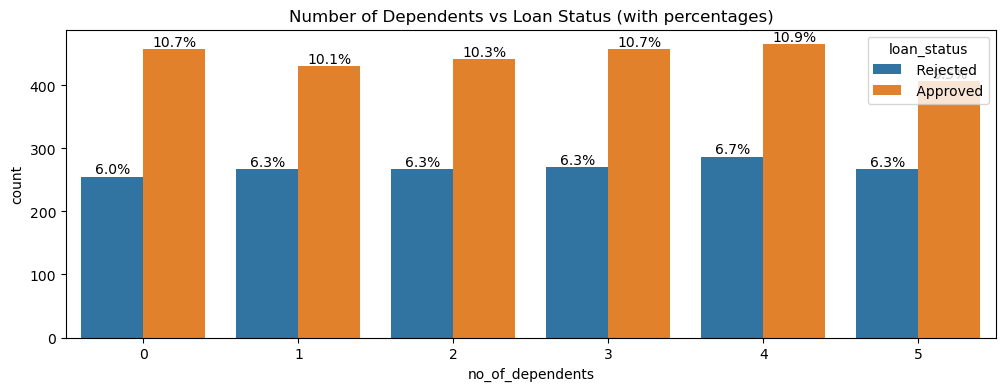

In [74]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='no_of_dependents', data=df, hue='loan_status')

# Calculate total count for percentage calculation
total = len(df)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v/total*100:.1f}%' for v in container.datavalues])

plt.title('Number of Dependents vs Loan Status (with percentages)')
plt.show()

# we could experiment with removing this feature, it seems to be not very useful

# 1.2 Analysis on categorical Cols

In [44]:
categorical_columns = df_analysis.select_dtypes(include=['object']).columns
for column in categorical_columns:
  print(df_analysis[column].unique())
# here we have two problems
# 1- we need to map the categorical features to numerical values
# 2- we need to handle the NaN values

[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


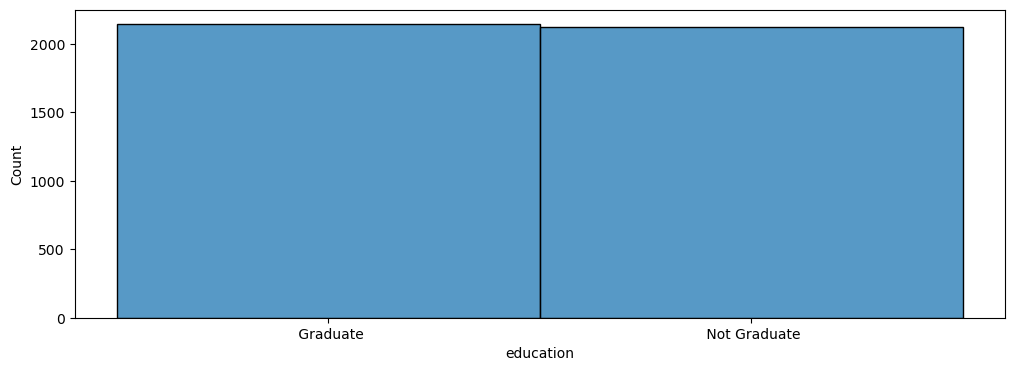

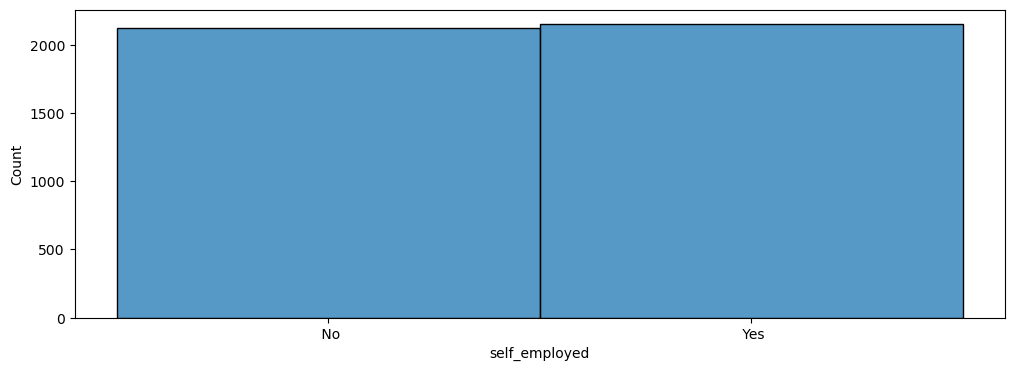

In [ ]:
# TEXT
# for column in categorical_columns:
#     print("Column: ",df_analysis[column].value_counts())

# VISUALIZATION
for col in df_analysis.columns:
    if df_analysis[col].dtype == 'O' and col != 'loan_status':  # Exclude 'loan_status' because it's the target we have a separate plot for it
        plt.figure(figsize=(12, 4))
        sns.histplot(df_analysis[col],kde=False)
        plt.show()

# insight -> categorical data are very balanced, so we can use them as they are

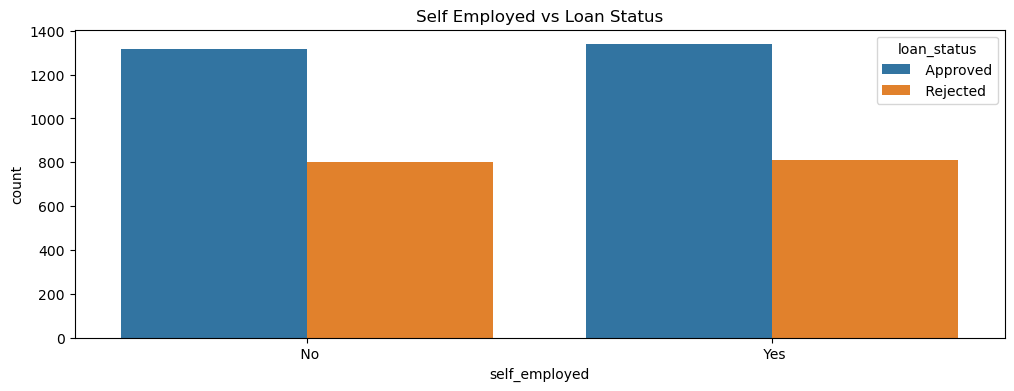

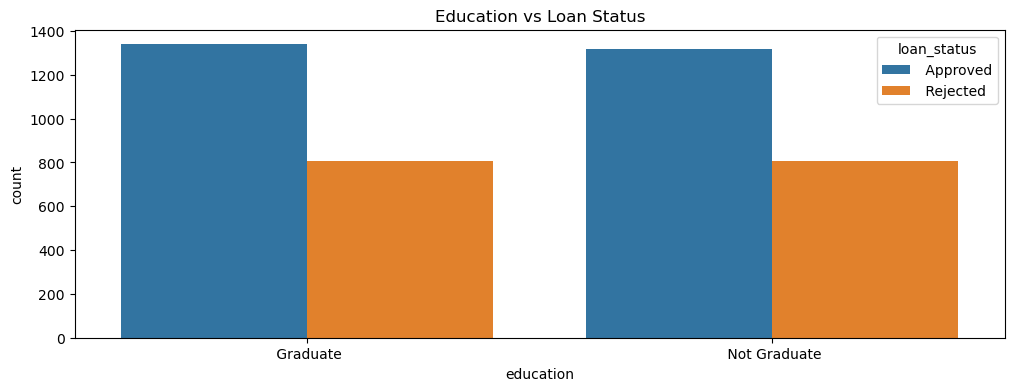

loan_status     Approved   Rejected
self_employed                      
No             62.199151  37.800849
Yes            62.232558  37.767442
loan_status    Approved   Rejected
education                         
Graduate      62.453358  37.546642
Not Graduate  61.976471  38.023529


In [55]:
# Categorical vs Target
plt.figure(figsize=(12,4))
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Self Employed vs Loan Status')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()

# percentages
self_target_per = pd.crosstab(df['self_employed'], df['loan_status'], normalize='index') * 100
print(self_target_per)

ed_target_per = pd.crosstab(df['education'], df['loan_status'], normalize='index') * 100
print(ed_target_per)

In [56]:
# from this we can see that these both features can be removed because they don't provide anything for the target

# 1.3 Target distribution -> do we have unbalnced target?

In [47]:
print("Available columns:")
print(df_analysis.columns.tolist())
print("\nDataFrame shape:", df_analysis.shape)

Available columns:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']

DataFrame shape: (4269, 13)


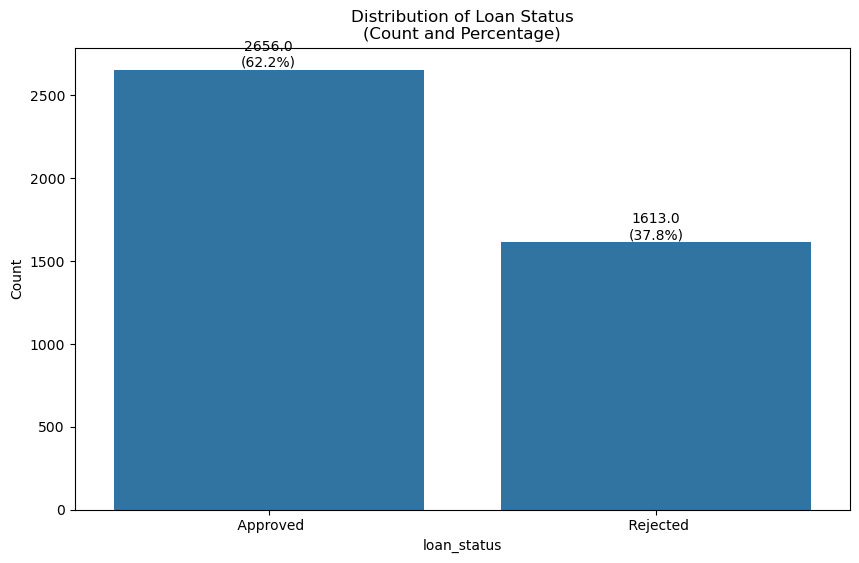

Loan Status Distribution:
 Approved: 2656 (62.2%)
 Rejected: 1613 (37.8%)

Class imbalance ratio: 62.2% vs 37.8%


In [63]:
# Better approach for categorical data with percentages
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_analysis, x='loan_status')

# Calculate total count for percentage calculation
total = len(df_analysis)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v}\n({v/total*100:.1f}%)' for v in container.datavalues])

plt.title('Distribution of Loan Status\n(Count and Percentage)')
plt.ylabel('Count')
plt.show()

# Also print the statistics
print("Loan Status Distribution:")
value_counts = df_analysis['loan_status'].value_counts()
percentages = df_analysis['loan_status'].value_counts(normalize=True) * 100

for status, count in value_counts.items():
    print(f"{status}: {count} ({percentages[status]:.1f}%)")

# Check for class imbalance
print(f"\nClass imbalance ratio: {percentages.max():.1f}% vs {percentages.min():.1f}%")

# 2 - Data cleaning & Pre-processing

In [119]:
df_clean = df.copy()

# 2.1 Duplicate data

In [120]:
# Check for duplicates
print(f"\nDuplicate rows in data frame: {df_clean.duplicated().sum()}")


Duplicate rows in data frame: 0


# 2.2 Missing Data (NAN values)

In [121]:
# Check for missing values
print(f"Missing values in data frame: {df.isnull().sum()}")

# when solving missing values we need to split the data into train and test sets to ensure no data leakage

Missing values in data frame: loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


# 2.3 encode categorical columns

In [122]:
df_clean = df_clean.drop(columns=['loan_id'])

In [123]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']
print(f"\nCategorical columns: {categorical_cols}")
# One-Hot Encoding for nominal columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)


Categorical columns: ['education', 'self_employed', 'loan_status']


In [124]:
# remove trailing and leading spaces from column names
df_clean.columns = df_clean.columns.str.strip()

# 2.4 Outlier detection (z-score)

In [125]:
# Removing outliers from dataset based on the Z-score method
print("Shape before removing outliers:", df_clean.shape)

z = np.abs((df_clean - df_clean.mean()) / df_clean.std())
threshold = 3
df_clean = df_clean[(z < threshold).all(axis=1)]

print(f"Shape after removing outliers: {df_clean.shape}") 

Shape before removing outliers: (4269, 12)
Shape after removing outliers: (4236, 12)


# 2.5 Feature normalization (standard scaler)

In [126]:
# Split the data into train and test sets so no data leakage happens
df_train, df_test = train_test_split(df_clean, test_size=0.2, random_state=42)

In [127]:
# Identify numerical columns (exclude target and encoded categorical columns)
numerical_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Fit scaler on training data only (avoid data leakage)
scaler.fit(df_train[numerical_cols])

# Transform both train and test sets
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

df_train_scaled[numerical_cols] = scaler.transform(df_train[numerical_cols])
df_test_scaled[numerical_cols] = scaler.transform(df_test[numerical_cols])

print("StandardScaler applied successfully!")
print(f"Scaled columns: {numerical_cols}")
print(f"Train shape: {df_train_scaled.shape}")
print(f"Test shape: {df_test_scaled.shape}")

# Verify scaling worked
print(f"\nBefore scaling - Train mean: {df_train[numerical_cols].mean().round(2).to_dict()}")
print(f"After scaling - Train mean: {df_train_scaled[numerical_cols].mean().round(2).to_dict()}")
print(f"After scaling - Train std: {df_train_scaled[numerical_cols].std().round(2).to_dict()}")

StandardScaler applied successfully!
Scaled columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Train shape: (3388, 12)
Test shape: (848, 12)

Before scaling - Train mean: {'no_of_dependents': 2.49, 'income_annum': 4996162.93, 'loan_amount': 14912691.85, 'loan_term': 10.91, 'cibil_score': 602.41, 'residential_assets_value': 7350619.83, 'commercial_assets_value': 4864610.39, 'luxury_assets_value': 14909297.52, 'bank_asset_value': 4909976.39}
After scaling - Train mean: {'no_of_dependents': -0.0, 'income_annum': 0.0, 'loan_amount': -0.0, 'loan_term': -0.0, 'cibil_score': -0.0, 'residential_assets_value': -0.0, 'commercial_assets_value': 0.0, 'luxury_assets_value': 0.0, 'bank_asset_value': -0.0}
After scaling - Train std: {'no_of_dependents': 1.0, 'income_annum': 1.0, 'loan_amount': 1.0, 'loan_term': 1.0, 'cibil_score': 1.0, 'residential_assets_value': 1.0

# 3 Model Building

In [128]:
df_model = pd.concat([df_train, df_test], ignore_index=True)
df_model.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
0,5,9800000,26600000,12,664,5200000,2900000,22500000,14100000,True,False,False
1,3,8500000,30800000,20,448,23000000,1400000,22900000,7900000,False,True,True
2,1,8400000,25000000,12,694,5300000,14900000,23000000,7700000,False,False,False
3,2,4700000,12000000,6,505,3400000,3800000,18000000,2300000,False,True,True
4,3,8700000,31100000,16,760,400000,1800000,19300000,4800000,False,False,True


In [130]:
X = df_model.drop(columns=['loan_status_ Rejected'])
y = df_model['loan_status_ Rejected']

In [131]:
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
0,5,9800000,26600000,12,664,5200000,2900000,22500000,14100000,True,False
1,3,8500000,30800000,20,448,23000000,1400000,22900000,7900000,False,True
2,1,8400000,25000000,12,694,5300000,14900000,23000000,7700000,False,False
3,2,4700000,12000000,6,505,3400000,3800000,18000000,2300000,False,True
4,3,8700000,31100000,16,760,400000,1800000,19300000,4800000,False,False


# 3.1 Logistic regression

In [132]:
train_logistic_regression(X, y, grid_search=True)

Performing grid search using 8 CPU cores...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8866

LOGISTIC REGRESSION EVALUATION RESULTS
Accuracy:  0.9210
Precision: 0.8892
Recall:    0.9031
F1-Score:  0.8961

Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.94       528
        True       0.89      0.90      0.90       320

    accuracy                           0.92       848
   macro avg       0.91      0.92      0.92       848
weighted avg       0.92      0.92      0.92       848


Confusion Matrix:
[[492  36]
 [ 31 289]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 3.1.1 Trying Feature removal

In [ ]:
# our analysis shows that there are some features that could be not useful for the model, so we will try removing them
# these features are: no_of_dependents, education, self_employed

# X_drop = X.drop(columns=[ 'self_employed_ Yes'])
# X_drop = X.drop(columns=['no_of_dependents'])
X_drop = X.drop(columns=['education_ Not Graduate', 'self_employed_ Yes'])
# X_drop = X.drop(columns=['education_ Not Graduate', 'no_of_dependents', 'self_employed_ Yes'])

train_logistic_regression(X_drop, y, grid_search=True)

#insights:

# best initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# removed features: self_employed -> no difference from initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# removed features: no_of_dependents -> worse than initial model
# Accuracy:  0.9198
# Precision: 0.8913
# Recall:    0.8969
# F1-Score:  0.8941

# removed features: no_of_dependents, self_employed -> better than initial model (best so far)
# Accuracy:  0.9233
# Precision: 0.8947
# Recall:    0.9031
# F1-Score:  0.8989

# removed features: no_of_dependents, education, self_employed -> worse than initial model
# Accuracy:  0.9222
# Precision: 0.8944
# Recall:    0.9000
# F1-Score:  0.8972

Performing grid search using 8 CPU cores...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8823

LOGISTIC REGRESSION EVALUATION RESULTS
Accuracy:  0.9198
Precision: 0.8913
Recall:    0.8969
F1-Score:  0.8941

Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.94       528
        True       0.89      0.90      0.89       320

    accuracy                           0.92       848
   macro avg       0.91      0.92      0.91       848
weighted avg       0.92      0.92      0.92       848


Confusion Matrix:
[[493  35]
 [ 33 287]]


# 3.1.2 Trying Feature engineering

In [141]:
df_feature_engineering = df_model.copy()

In [ ]:
# trying feature engineering
df_feature_engineering['debt_to_income'] = df_feature_engineering['loan_amount'] / df_feature_engineering['income_annum']
df_feature_engineering= df_feature_engineering.drop(columns=['loan_amount','income_annum'])

In [ ]:
X = df_feature_engineering.drop(columns=['loan_status_ Rejected'])
y = df_feature_engineering['loan_status_ Rejected']

train_logistic_regression(X, y, grid_search=True)

# insights:
# best initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# model after feature engineering -> better precision / worse recall
# Accuracy:  0.9210
# Precision: 0.8941
# Recall:    0.8969
# F1-Score:  0.8955

Performing grid search using 8 CPU cores...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8814

LOGISTIC REGRESSION EVALUATION RESULTS
Accuracy:  0.9210
Precision: 0.8941
Recall:    0.8969
F1-Score:  0.8955

Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       528
        True       0.89      0.90      0.90       320

    accuracy                           0.92       848
   macro avg       0.92      0.92      0.92       848
weighted avg       0.92      0.92      0.92       848


Confusion Matrix:
[[494  34]
 [ 33 287]]


# 3.1.3 Trying Balancing the target

In [ ]:
# trying balancing the target
train_logistic_regression(X, y, grid_search=True, balanced='balanced')

#insights:
# best initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# model after balancing target -> better model 
# Accuracy:  0.9281
# Precision: 0.8689
# Recall:    0.9531
# F1-Score:  0.9091

Performing grid search using 8 CPU cores...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9011

LOGISTIC REGRESSION EVALUATION RESULTS
Accuracy:  0.9281
Precision: 0.8689
Recall:    0.9531
F1-Score:  0.9091

Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.91      0.94       528
        True       0.87      0.95      0.91       320

    accuracy                           0.93       848
   macro avg       0.92      0.93      0.92       848
weighted avg       0.93      0.93      0.93       848


Confusion Matrix:
[[482  46]
 [ 15 305]]


# 3.1.4 combining all of the above

In [ ]:
df_feature_engineering = df_model.copy()

# 1-feature engineering
df_feature_engineering['debt_to_income'] = df_feature_engineering['loan_amount'] / df_feature_engineering['income_annum']
df_feature_engineering= df_feature_engineering.drop(columns=['loan_amount','income_annum'])

X = df_feature_engineering.drop(columns=['loan_status_ Rejected'])
y = df_feature_engineering['loan_status_ Rejected']

# 2-dropping features that are not useful
X = X.drop(columns=['education_ Not Graduate', 'self_employed_ Yes'])

# 3-balancing the target
train_logistic_regression(X, y, grid_search=True, balanced='balanced')


#insights:
# # best initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# model after feature engineering and balancing (no dropping features): -> same results as the model after balancing the target
# Accuracy:  0.9281
# Precision: 0.8689
# Recall:    0.9531
# F1-Score:  0.9091

# model after feature engineering ,balancing and dropping features: -> better precision but worse recall
# Accuracy:  0.9281
# Precision: 0.8711
# Recall:    0.9500
# F1-Score:  0.9088

Performing grid search using 8 CPU cores...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9030

LOGISTIC REGRESSION EVALUATION RESULTS
Accuracy:  0.9281
Precision: 0.8711
Recall:    0.9500
F1-Score:  0.9088

Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.91      0.94       528
        True       0.87      0.95      0.91       320

    accuracy                           0.93       848
   macro avg       0.92      0.93      0.92       848
weighted avg       0.93      0.93      0.93       848


Confusion Matrix:
[[483  45]
 [ 16 304]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# overall best two models for logistic regression:

# model after feature engineering and balancing (no dropping features): -> same results as the model after balancing the target
# Accuracy:  0.9281
# Precision: 0.8689
# Recall:    0.9531
# F1-Score:  0.9091

# model after feature engineering ,balancing and dropping features: -> better precision but worse recall
# Accuracy:  0.9281
# Precision: 0.8711
# Recall:    0.9500
# F1-Score:  0.9088

# 3.2 Random forest

In [154]:
X = df_model.drop(columns=['loan_status_ Rejected'])
y = df_model['loan_status_ Rejected']

In [ ]:
train_random_forest(X, y, grid_search=True)

Performing grid search using 8 CPU cores...
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


# 3.2.1 Trying Feature removal

In [ ]:
# our analysis shows that there are some features that could be not useful for the model, so we will try removing them
# these features are: no_of_dependents, education, self_employed

# X_drop = X.drop(columns=[ 'self_employed_ Yes'])
# X_drop = X.drop(columns=['no_of_dependents'])
X_drop = X.drop(columns=['education_ Not Graduate', 'self_employed_ Yes'])
# X_drop = X.drop(columns=['education_ Not Graduate', 'no_of_dependents', 'self_employed_ Yes'])

train_logistic_regression(X_drop, y, grid_search=True)

#insights:

# best initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# removed features: self_employed -> no difference from initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# removed features: no_of_dependents -> worse than initial model
# Accuracy:  0.9198
# Precision: 0.8913
# Recall:    0.8969
# F1-Score:  0.8941

# removed features: no_of_dependents, self_employed -> better than initial model (best so far)
# Accuracy:  0.9233
# Precision: 0.8947
# Recall:    0.9031
# F1-Score:  0.8989

# removed features: no_of_dependents, education, self_employed -> worse than initial model
# Accuracy:  0.9222
# Precision: 0.8944
# Recall:    0.9000
# F1-Score:  0.8972

# 3.1.2 Trying Feature engineering

In [ ]:
df_feature_engineering = df_model.copy()

In [ ]:
# trying feature engineering
df_feature_engineering['debt_to_income'] = df_feature_engineering['loan_amount'] / df_feature_engineering['income_annum']
df_feature_engineering= df_feature_engineering.drop(columns=['loan_amount','income_annum'])

In [ ]:
X = df_feature_engineering.drop(columns=['loan_status_ Rejected'])
y = df_feature_engineering['loan_status_ Rejected']

train_logistic_regression(X, y, grid_search=True)

# insights:
# best initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# model after feature engineering -> better precision / worse recall
# Accuracy:  0.9210
# Precision: 0.8941
# Recall:    0.8969
# F1-Score:  0.8955

# 3.1.3 Trying Balancing the target

In [ ]:
# trying balancing the target
train_logistic_regression(X, y, grid_search=True, balanced='balanced')

#insights:
# best initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# model after balancing target -> better model 
# Accuracy:  0.9281
# Precision: 0.8689
# Recall:    0.9531
# F1-Score:  0.9091

# 3.1.4 combining all of the above

In [ ]:
df_feature_engineering = df_model.copy()

# 1-feature engineering
df_feature_engineering['debt_to_income'] = df_feature_engineering['loan_amount'] / df_feature_engineering['income_annum']
df_feature_engineering= df_feature_engineering.drop(columns=['loan_amount','income_annum'])

X = df_feature_engineering.drop(columns=['loan_status_ Rejected'])
y = df_feature_engineering['loan_status_ Rejected']

# 2-dropping features that are not useful
X = X.drop(columns=['education_ Not Graduate', 'self_employed_ Yes'])

# 3-balancing the target
train_logistic_regression(X, y, grid_search=True, balanced='balanced')


#insights:
# # best initial model
# Accuracy:  0.9210
# Precision: 0.8892
# Recall:    0.9031
# F1-Score:  0.8961

# model after feature engineering and balancing (no dropping features): -> same results as the model after balancing the target
# Accuracy:  0.9281
# Precision: 0.8689
# Recall:    0.9531
# F1-Score:  0.9091

# model after feature engineering ,balancing and dropping features: -> better precision but worse recall
# Accuracy:  0.9281
# Precision: 0.8711
# Recall:    0.9500
# F1-Score:  0.9088

In [ ]:
# overall best two models for random forest:
